# **ESCUELA POLITECNICA NACIONAL**

**Nombre:** Anthony Reinoso

---

## Ejercicio 3: Representación Gráfica de Vectores de Documentos y Consultas

##Objetivo de la práctica
* Comprender la representación de documentos y consultas en el modelo de espacio vectorial, mediante el cálculo de matrices término-documento usando medidas como TF y TF-IDF.

* Aplicar la similitud coseno para comparar documentos con consultas, y utilizarla para recuperar y ordenar documentos según su relevancia.

* Visualizar de forma intuitiva los vectores de documentos y consultas, mediante reducción de dimensionalidad y representación gráfica en el plano, para facilitar la interpretación geométrica de la recuperación de información.

###Parte 1: Construcción de la matriz término-documento y TF-IDF
###Actividad
1. Usa el siguiente corpus de 4 documentos.
2. Vectoriza los documentos usando:
* Frecuencia absoluta (TF)
* TF-IDF
3. Visualiza los documentos como un gráfico de dispersión 2D y 3D.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

In [4]:
documents = [
    "El gato se escondió debajo de la cama.",
    "La cama estaba limpia y cómoda.",
    "El perro y el gato jugaron en el jardín.",
    "La limpieza del jardín es importante."
]

In [5]:
documents[0].lower().strip('.')

'el gato se escondió debajo de la cama'

In [6]:
vocab =set()

for doc in documents:
    for word in doc.lower().strip('.').split(" "):
      vocab.add(word)
print(vocab)

{'es', 'el', 'importante', 'se', 'y', 'en', 'de', 'del', 'la', 'limpieza', 'debajo', 'perro', 'jugaron', 'gato', 'cómoda', 'escondió', 'jardín', 'limpia', 'estaba', 'cama'}


In [7]:
dict_tf = {}
i = 0
for doc in documents:
  dict_tfd = {}
  for term in vocab:
    count = doc.lower().strip('.').count(term)
    dict_tfd[term] = count
  dict_tf[i] = dict_tfd
  i += 1
print(dict_tf)

{0: {'es': 1, 'el': 1, 'importante': 0, 'se': 1, 'y': 0, 'en': 0, 'de': 2, 'del': 0, 'la': 1, 'limpieza': 0, 'debajo': 1, 'perro': 0, 'jugaron': 0, 'gato': 1, 'cómoda': 0, 'escondió': 1, 'jardín': 0, 'limpia': 0, 'estaba': 0, 'cama': 1}, 1: {'es': 1, 'el': 0, 'importante': 0, 'se': 0, 'y': 1, 'en': 0, 'de': 0, 'del': 0, 'la': 1, 'limpieza': 0, 'debajo': 0, 'perro': 0, 'jugaron': 0, 'gato': 0, 'cómoda': 1, 'escondió': 0, 'jardín': 0, 'limpia': 1, 'estaba': 1, 'cama': 1}, 2: {'es': 0, 'el': 3, 'importante': 0, 'se': 0, 'y': 1, 'en': 1, 'de': 0, 'del': 0, 'la': 0, 'limpieza': 0, 'debajo': 0, 'perro': 1, 'jugaron': 1, 'gato': 1, 'cómoda': 0, 'escondió': 0, 'jardín': 1, 'limpia': 0, 'estaba': 0, 'cama': 0}, 3: {'es': 1, 'el': 1, 'importante': 1, 'se': 0, 'y': 0, 'en': 0, 'de': 1, 'del': 1, 'la': 1, 'limpieza': 1, 'debajo': 0, 'perro': 0, 'jugaron': 0, 'gato': 0, 'cómoda': 0, 'escondió': 0, 'jardín': 1, 'limpia': 0, 'estaba': 0, 'cama': 0}}


In [8]:
matriz = pd.DataFrame(dict_tf)
matriz.T

,es,el,importante,se,y,en,de,del,la,limpieza,debajo,perro,jugaron,gato,cómoda,escondió,jardín,limpia,estaba,cama
0,1,1,0,1,0,0,2,0,1,0,1,0,0,1,0,1,0,0,0,1
1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,1,1
2,0,3,0,0,1,1,0,0,0,0,0,1,1,1,0,0,1,0,0,0
3,1,1,1,0,0,0,1,1,1,1,0,0,0,0,0,0,1,0,0,0


In [9]:
matriz.to_csv('matriz_tf.csv', index=True)

In [10]:
pca = PCA(n_components=2)
docs_2d = pca.fit_transform(matriz.T)
docs_2d

array([[-1.07928449,  1.73739882],
       [-1.35204195, -1.83917526],
       [ 2.79812836, -0.18141402],
       [-0.36680192,  0.28319046]])

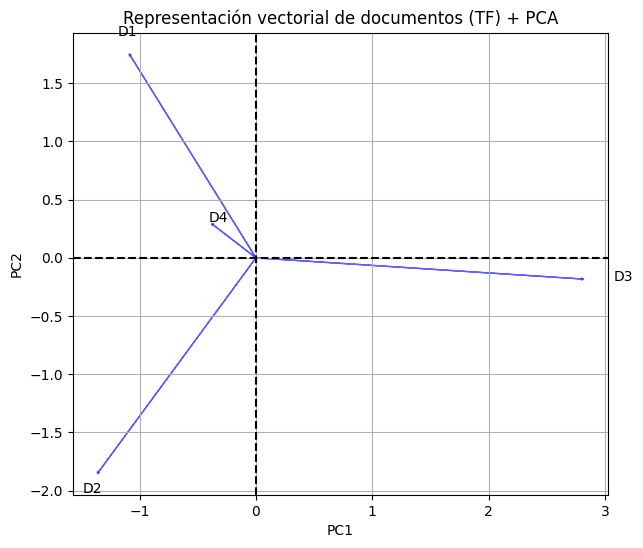

In [11]:
plt.figure(figsize=(10, 6))
for i, (x, y) in enumerate(docs_2d):
  plt.arrow(0, 0, x, y, head_width=0.02, head_length=0.02, fc='blue', ec='blue', alpha=0.6)
  plt.text(x * 1.1, y *1.1 , f"D{i+1}", fontsize=10)

plt.title("Representación vectorial de documentos (TF) + PCA")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.axhline(0, color='black', linestyle='--')
plt.axvline(0, color='black', linestyle='--')
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

In [12]:
N = len(documents)
idf = {}

for term in vocab:
    df = sum(1 for doc in documents if term in doc.lower())
    idf[term] = math.log(N / (df + 1))  # Se suma 1 para evitar división entre cero

print("IDF:")
print(idf)

IDF:
{'es': 0.0, 'el': 0.0, 'importante': 0.6931471805599453, 'se': 0.6931471805599453, 'y': 0.28768207245178085, 'en': 0.6931471805599453, 'de': 0.28768207245178085, 'del': 0.6931471805599453, 'la': 0.0, 'limpieza': 0.6931471805599453, 'debajo': 0.6931471805599453, 'perro': 0.6931471805599453, 'jugaron': 0.6931471805599453, 'gato': 0.28768207245178085, 'cómoda': 0.6931471805599453, 'escondió': 0.6931471805599453, 'jardín': 0.28768207245178085, 'limpia': 0.6931471805599453, 'estaba': 0.6931471805599453, 'cama': 0.28768207245178085}


In [13]:
tfidf = {}

for doc_id, tf_dict in dict_tf.items():
    tfidf_doc = {}
    for term in vocab:
        tf = tf_dict[term]
        tfidf_doc[term] = tf * idf[term]
    tfidf[doc_id] = tfidf_doc

matriz_tfidf = pd.DataFrame(tfidf)
matriz_tfidf.T


,es,el,importante,se,y,en,de,del,la,limpieza,debajo,perro,jugaron,gato,cómoda,escondió,jardín,limpia,estaba,cama
0,0.0,0.0,0.000000,0.693147,0.000000,0.000000,0.575364,0.000000,0.0,0.000000,0.693147,0.000000,0.000000,0.287682,0.000000,0.693147,0.000000,0.000000,0.000000,0.287682
1,0.0,0.0,0.000000,0.000000,0.287682,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.693147,0.000000,0.000000,0.693147,0.693147,0.287682
2,0.0,0.0,0.000000,0.000000,0.287682,0.693147,0.000000,0.000000,0.0,0.000000,0.000000,0.693147,0.693147,0.287682,0.000000,0.000000,0.287682,0.000000,0.000000,0.000000
3,0.0,0.0,0.693147,0.000000,0.000000,0.000000,0.287682,0.693147,0.0,0.693147,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.287682,0.000000,0.000000,0.000000


In [14]:
pca = PCA(n_components=2)
docs_2d = pca.fit_transform(matriz_tfidf.T)
docs_2d

array([[ 1.04505465,  0.22032487],
       [-0.46646992,  0.91669358],
       [-0.66717351, -0.39441705],
       [ 0.08858878, -0.7426014 ]])

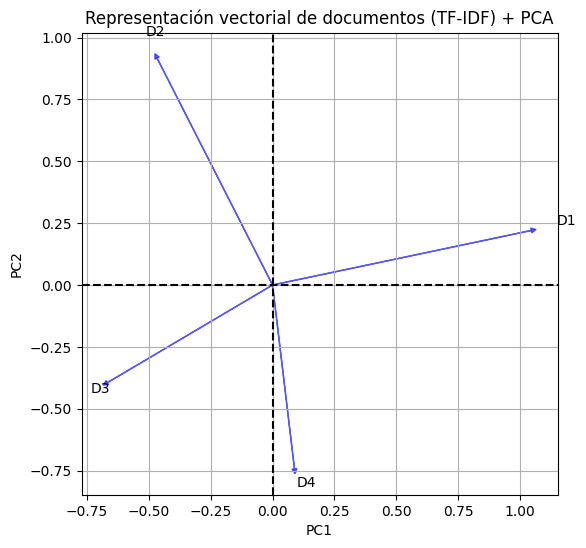

In [15]:
plt.figure(figsize=(10, 6))
for i, (x, y) in enumerate(docs_2d):
  plt.arrow(0, 0, x, y, head_width=0.02, head_length=0.02, fc='blue', ec='blue', alpha=0.6)
  plt.text(x * 1.1, y *1.1 , f"D{i+1}", fontsize=10)

plt.title("Representación vectorial de documentos (TF-IDF) + PCA")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.axhline(0, color='black', linestyle='--')
plt.axvline(0, color='black', linestyle='--')
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

[[ 1.04505465  0.22032487  0.3903998 ]
 [-0.46646992  0.91669358 -0.3903998 ]
 [-0.66717351 -0.39441705  0.78079959]
 [ 0.08858878 -0.7426014  -0.78079959]]


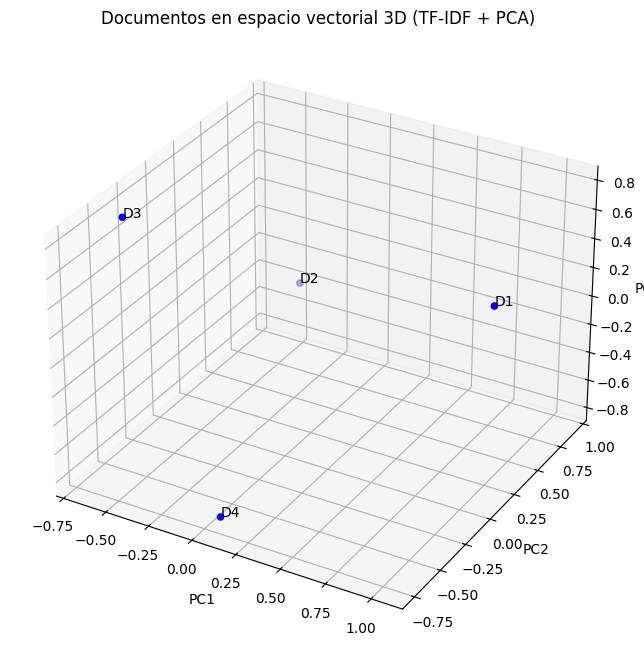

In [16]:
pca_3d = PCA(n_components=3)
docs_3d = pca_3d.fit_transform(matriz_tfidf.T)
print(docs_3d)

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(docs_3d[:, 0], docs_3d[:, 1], docs_3d[:, 2], color='blue')

for i, txt in enumerate(["D1", "D2", "D3", "D4"]):
    ax.text(docs_3d[i, 0], docs_3d[i, 1], docs_3d[i, 2], txt)

ax.set_title("Documentos en espacio vectorial 3D (TF-IDF + PCA)")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
plt.show()

###Parte 2: Representación de la consulta como vector
###Actividad
1. Ingresa una consulta como texto.
2. Representa la consulta en el mismo espacio vectorial que los documentos.
3. Calcula similitud coseno entre la consulta y cada documento.
4. Visualiza la consulta como un vector en el mismo espacio vectorial que los documentos.


Similitud coseno de la consulta con cada documento:
Documento 1: 0.1107
Documento 2: 0.4940
Documento 3: 0.0000
Documento 4: 0.0000


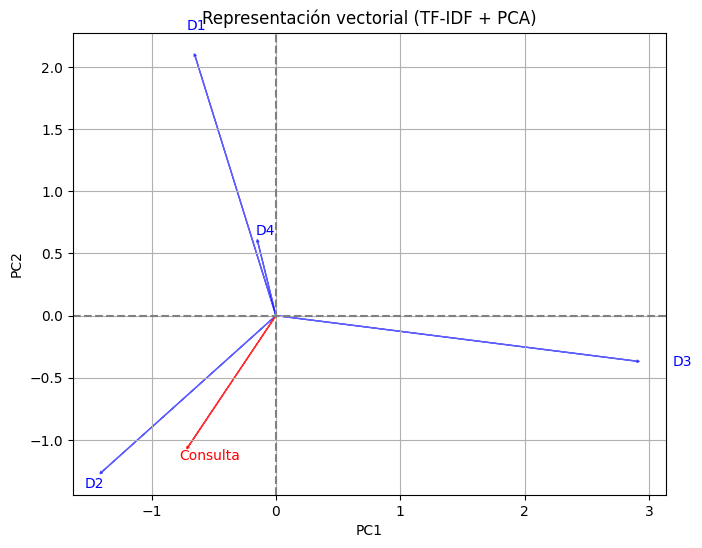

In [17]:
consulta = "cama limpia".lower().split()

tf_consulta = {term: consulta.count(term) for term in vocab}
tfidf_consulta = {term: tf_consulta[term] * idf.get(term, 0) for term in vocab}

# Agrega consulta a la matriz
matriz['consulta'] = pd.Series(tfidf_consulta)

# Similitud coseno
similaridades = cosine_similarity(matriz.T.values)
print("\nSimilitud coseno de la consulta con cada documento:")
for i in range(N):
    print(f"Documento {i+1}: {similaridades[-1][i]:.4f}")

# PCA y visualización
pca = PCA(n_components=2)
docs_2d = pca.fit_transform(matriz.T.values)

plt.figure(figsize=(10, 6))
for i, (x, y) in enumerate(docs_2d[:-1]):
    plt.arrow(0, 0, x, y, head_width=0.02, head_length=0.02, fc='blue', ec='blue', alpha=0.6)
    plt.text(x * 1.1, y * 1.1, f"D{i+1}", fontsize=10, color='blue')

x_c, y_c = docs_2d[-1]
plt.arrow(0, 0, x_c, y_c, head_width=0.02, head_length=0.02, fc='red', ec='red', alpha=0.8)
plt.text(x_c * 1.1, y_c * 1.1, "Consulta", fontsize=10, color='red')

plt.title("Representación vectorial (TF-IDF + PCA)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

###Parte 3: Consulta por similitud y ranking de documentos
###Actividad
1. Con la misma representación de vectores, implementar una función que devuelva los documentos más relevantes a una consulta usando similitud coseno.
2. Dibuja los vectores (de documentos y de consulta) como flechas desde el origen usando plt.quiver() o plt.arrow()


Ranking de documentos más relevantes a la consulta:
Documento 2: similitud = 0.4940
Documento 1: similitud = 0.1107
Documento 3: similitud = 0.0000


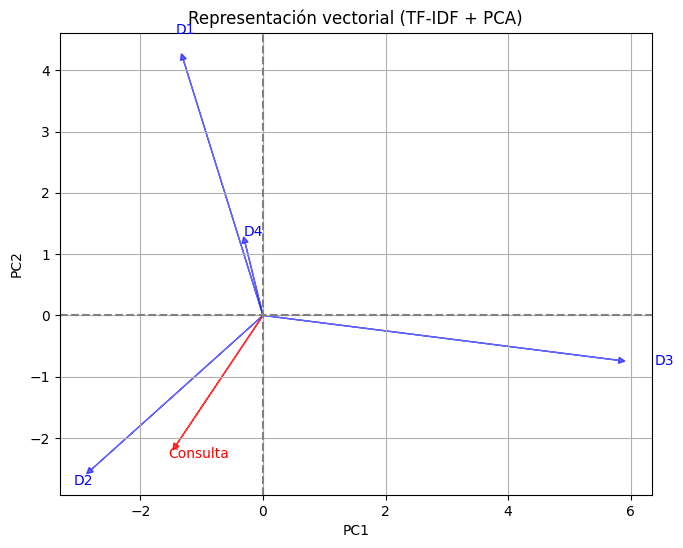

In [18]:
def obtener_documentos_relevantes(matriz, top_k=3):
    sim_scores = cosine_similarity(matriz.T.values)[-1][:-1]
    ranking = sorted(enumerate(sim_scores), key=lambda x: x[1], reverse=True)
    print("\nRanking de documentos más relevantes a la consulta:")
    for idx, score in ranking[:top_k]:
        print(f"Documento {idx+1}: similitud = {score:.4f}")
    return ranking[:top_k]

ranking_docs = obtener_documentos_relevantes(matriz)

# PCA y visualización
pca = PCA(n_components=2)
docs_2d = pca.fit_transform(matriz.T.values)

plt.figure(figsize=(10, 6))
factor = 2  # Aumenta la visibilidad de los vectores

# Vectores de documentos
for i, (x, y) in enumerate(docs_2d[:-1]):
    plt.arrow(0, 0, x*factor, y*factor, head_width=0.1, head_length=0.1, fc='blue', ec='blue', alpha=0.6)
    plt.text(x * factor * 1.1, y * factor * 1.1, f"D{i+1}", fontsize=10, color='blue')

# Vector de consulta
x_c, y_c = docs_2d[-1]
plt.arrow(0, 0, x_c*factor, y_c*factor, head_width=0.1, head_length=0.1, fc='red', ec='red', alpha=0.8)
plt.text(x_c * factor * 1.1, y_c * factor * 1.1, "Consulta", fontsize=10, color='red')

plt.title("Representación vectorial (TF-IDF + PCA)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()
